Data Preprocessing

In [85]:
file_path = r'D:\美赛\比赛ing\Code\Problem_C_Data_Wordle.xlsx'

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Show the data
Ori_data = pd.read_excel(file_path)
Ori_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Percent in,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,NaN,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
2,NaN,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
3,NaN,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
4,NaN,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1


In [88]:
# Check the null
Ori_data.isnull().any()

Unnamed: 0      True
Unnamed: 1     False
Unnamed: 2     False
Unnamed: 3     False
Unnamed: 4     False
Unnamed: 5     False
Percent in     False
Unnamed: 7     False
Unnamed: 8     False
Unnamed: 9     False
Unnamed: 10    False
Unnamed: 11    False
Unnamed: 12    False
dtype: bool

In [89]:
# change the column name
Column_name = Ori_data.iloc[0,:].values

In [90]:
Ori_data.columns = Column_name

In [91]:
# drop the first line as well as the first row
Data = Ori_data.drop(axis=0,index=0)
Data = Data.iloc[:,1:]
Data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3


In [92]:
#训练时要drop
#Data.drop(279,inplace=True)

In [133]:
mean = Data.iloc[:,3].mean()
std = Data.iloc[:,3].std()
print(mean,std)

90918.87743732591 89274.37473030954


In [118]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
total_number = x_sc.fit_transform(Data.iloc[:,3].values.reshape(-1,1))

In [121]:
number = []
for list in total_number.tolist():
    number.append(list[0])

In [123]:
len(number)

359

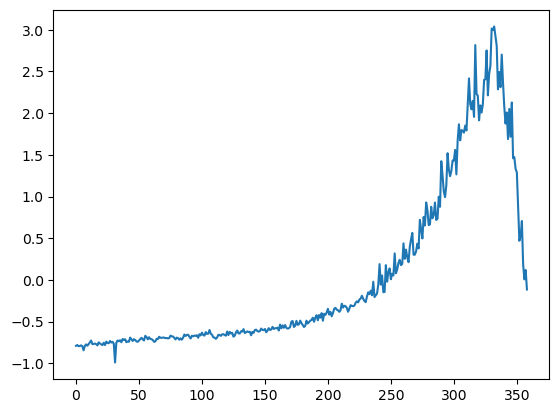

In [124]:
plt.plot(number)

ARIMA

In [125]:
# ARIMA 
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in number]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[0.5218148]


In [99]:
from arch.unitroot import ADF

In [126]:
print(ADF(number)) 

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.812
P-value                         0.003
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [101]:
total_number_diff1 = Data.iloc[:,3].diff(1)

In [102]:
ADF(total_number_diff1.dropna().tolist())

d:\pytorch\lib\site-packages\arch\unitroot\unitroot.py:165: RuntimeWarning: invalid value encountered in log
  llf = -nobs / 2.0 * (log(2 * pi) + log(sigma2) + 1)


Test Statistic,-27.458
P-value,0.000
Lags,0


In [103]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb=acorr_ljungbox(total_number_diff1.dropna(), lags = [i for i in range(1,12)],boxpierce=True)
print("白噪声检验")
print(lb)

白噪声检验
      lb_stat     lb_pvalue    bp_stat     bp_pvalue
1   46.991745  7.128632e-12  46.600147  8.705371e-12
2   54.438502  1.509487e-12  53.964163  1.913511e-12
3   61.574399  2.709057e-13  61.000950  3.592300e-13
4   64.221191  3.754157e-13  63.603629  5.064602e-13
5   66.680401  5.020418e-13  66.015020  6.900587e-13
6   69.425382  5.363217e-13  68.699002  7.555883e-13
7   69.564497  1.809238e-12  68.834639  2.540187e-12
8   80.094213  4.679983e-14  79.071863  7.515150e-14
9   80.357298  1.372426e-13  79.326910  2.198504e-13
10  82.464898  1.647610e-13  81.364256  2.710884e-13
11  83.204627  3.530970e-13  82.077272  5.844121e-13


In [104]:
import statsmodels.api as sm

In [105]:
train_results = sm.tsa.arma_order_select_ic(total_number_diff1.dropna(), ic=['aic', 'bic'], max_ar=4, max_ma=4)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)



d:\pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC (4, 2)
BIC (4, 2)


In [143]:
#data1 = total_number_diff1.dropna()
model1 = sm.tsa.ARIMA(pd.DataFrame(number).astype(float), order=(4, 1, 2))  # 传入参数，构建并拟合模型
result=model1.fit()
predict_data = result.predict(0, 358)  # 预测数据
print('预测数据')
print(predict_data)
forecast_data = result.forecast(60)  # 预测未来数据

d:\pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\pytorch\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


预测数据
0      0.000000
1     -0.791239
2     -0.785370
3     -0.790501
4     -0.795217
         ...   
354    0.444031
355    0.471623
356    0.146330
357   -0.126358
358    0.022551
Name: predicted_mean, Length: 359, dtype: float64


d:\pytorch\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


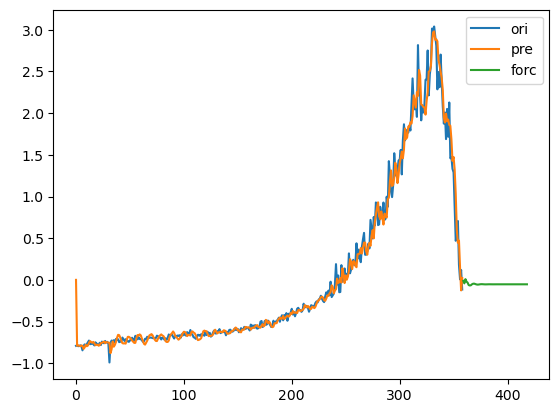

----------预测未来值


In [144]:
plt.plot(number, label='ori')
plt.plot(predict_data, label='pre')
plt.plot(forecast_data, label='forc')
plt.legend()
plt.show()
print('----------预测未来值')

In [140]:
forc = forecast_data*std+mean
forc.tail(10)

409    86160.939061
410    86161.001681
411    86161.109715
412    86161.183098
413    86161.189630
414    86161.148042
415    86161.099529
416    86161.075484
417    86161.082016
418    86161.104858
Name: predicted_mean, dtype: float64

In [138]:
from sklearn.metrics import r2_score
# calculate MSE 均方误差
#mse=mean_squared_error(data1,predict_data)
# calculate RMSE 均方根误差
#rmse = math.sqrt(mean_squared_error(data1,predict_data))
#calculate MAE 平均绝对误差
#mae=mean_absolute_error(data1,predict_data)
#calculate R square
r_square=r2_score(number,predict_data)
#print('均方误差MSE: %.6f' % mse)
#print('均方根误差RMSE: %.6f' % rmse)
#print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)


R_square: 0.983174


holtwinters

In [141]:
# HWES
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in number]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
predict_data = model_fit.predict(0, 357)  # 预测数据
forecast_data = result.forecast(60)  # 预测未来数据


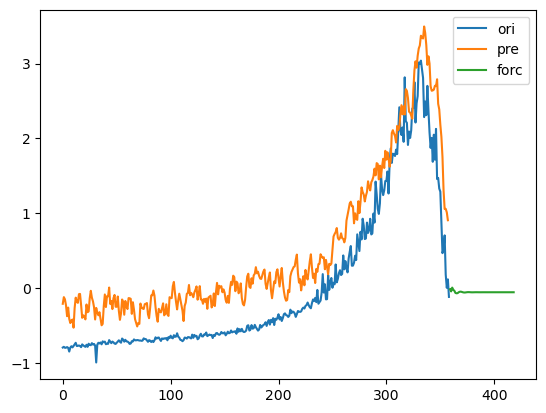

----------预测未来值


In [142]:
plt.plot(number, label='ori')
plt.plot(predict_data, label='pre')
plt.plot(forecast_data, label='forc')
plt.legend()
plt.show()
print('----------预测未来值')